### Daftar Isi
* [1) Mengumpulkan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Memvalidasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Mengkonstruksi Data](#h6)
* [7) Menentukan Label Data](#h7)
* [8) Membangun Model](#h8)
* [9) Mengevaluasi Hasil Pemodelan](#h9)
* [10) Optimasi Model Klasifikasi](#h10)

## 1) Mengumpulkan Data <a class="anchor" id="h1"></a>

Kelas:

* Malignant (Ganas)
* Benign (Jinak)

In [237]:
# Load library yang diperlukan
import pandas as pd

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
# Load data menjadi data frame
dataset = pd.read_csv('/content/drive/MyDrive/BK-DS/02_Breast_Cancer/dataset/breast-cancer-wisconsin.data', header=None)


In [240]:
print(dataset.shape)
print(dataset.head())

(699, 11)
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2


In [241]:
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [242]:
# Memasukkan nama fitur kedalam dataset
dataset.columns = [
    "Sample_code_number", "Clump_thickness", "Uniformity_of_cell_size",
    "Uniformity_of_cell_shape", "Marginal_adhesion", "Single_epithelial_cell_size",
    "Bare_nuclei", "Bland_chromatin", "Normal_nucleoli", "Mitoses", "Class"
]

In [243]:
# Lakukan pengecekan apakah dataset sudah benar dengan menampilkan 5 data teratas
dataset.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2) Menelaah Data <a class="anchor" id="h2"></a>

In [244]:
# Menampilkan informasi dari file dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [245]:
# Menampilkan deskripsi dari file dataset
dataset.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [246]:
# Distribusi
import seaborn as sns
import matplotlib.pyplot as plt

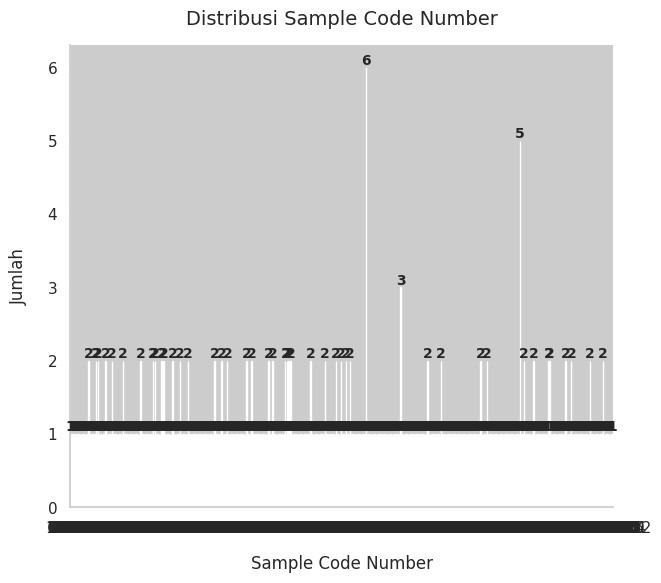

In [247]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Sample_code_number'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Sample Code Number", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Sample Code Number", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


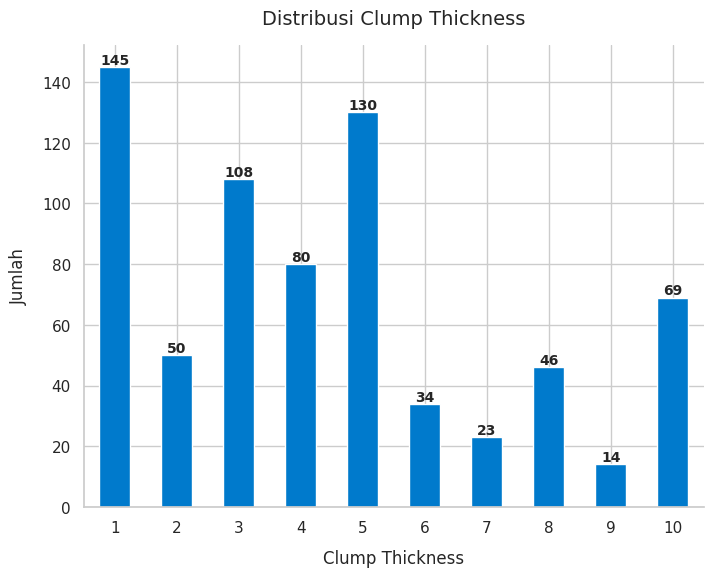

In [248]:
sns.set(style="whitegrid")

# Buat figure dan axis
plt.figure(figsize=(8, 6))
ax = dataset['Clump_thickness'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Clump Thickness", fontsize=12, labelpad=10)
plt.ylabel("Jumlah", fontsize=12, labelpad=10)
plt.title("Distribusi Clump Thickness", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


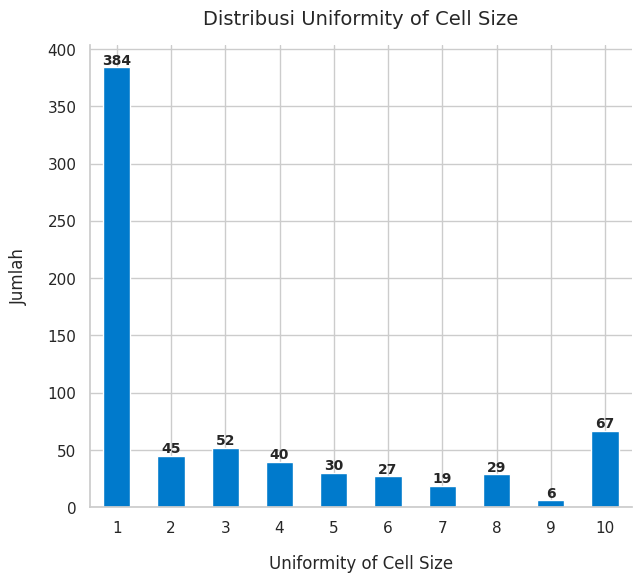

In [249]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Uniformity_of_cell_size'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Uniformity of Cell Size", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Uniformity of Cell Size", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


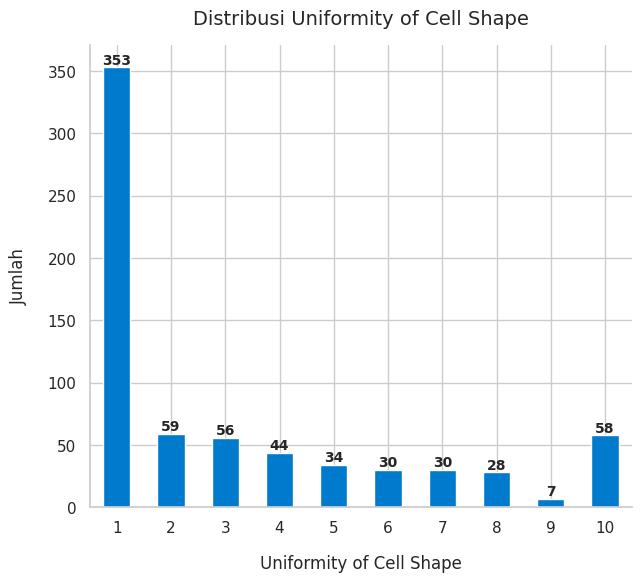

In [250]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Uniformity_of_cell_shape'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Uniformity of Cell Shape", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Uniformity of Cell Shape", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


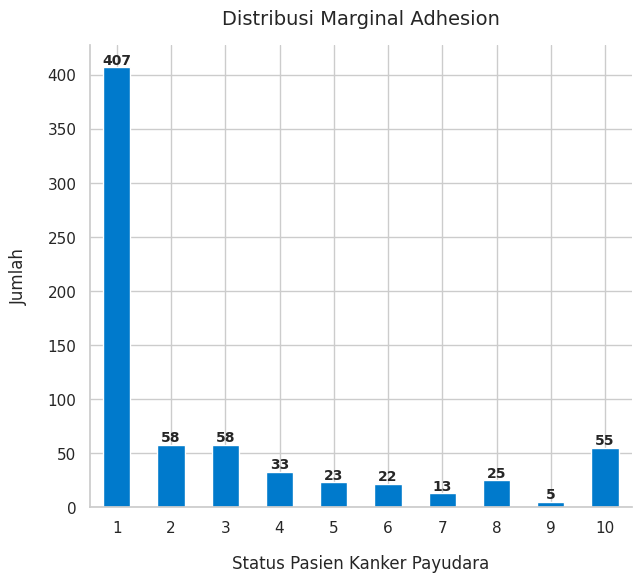

In [251]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Marginal_adhesion'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Status Pasien Kanker Payudara", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Marginal Adhesion", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


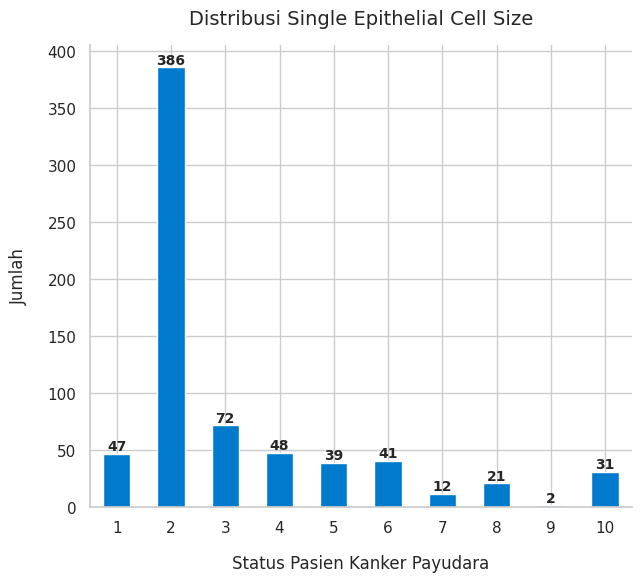

In [252]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Single_epithelial_cell_size'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Status Pasien Kanker Payudara", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Single Epithelial Cell Size", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


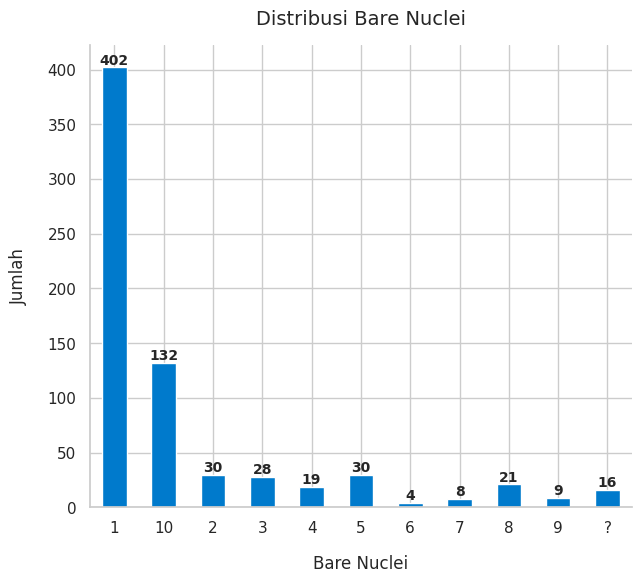

In [253]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Bare_nuclei'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Bare Nuclei", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Bare Nuclei", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


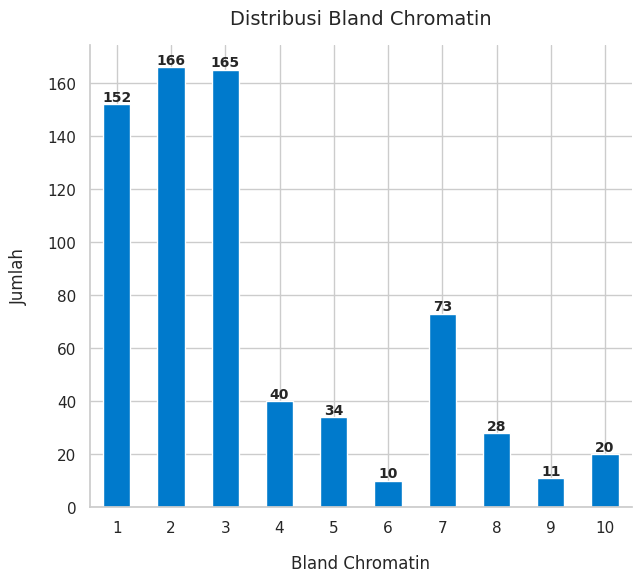

In [254]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Bland_chromatin'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Bland Chromatin", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Bland Chromatin", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


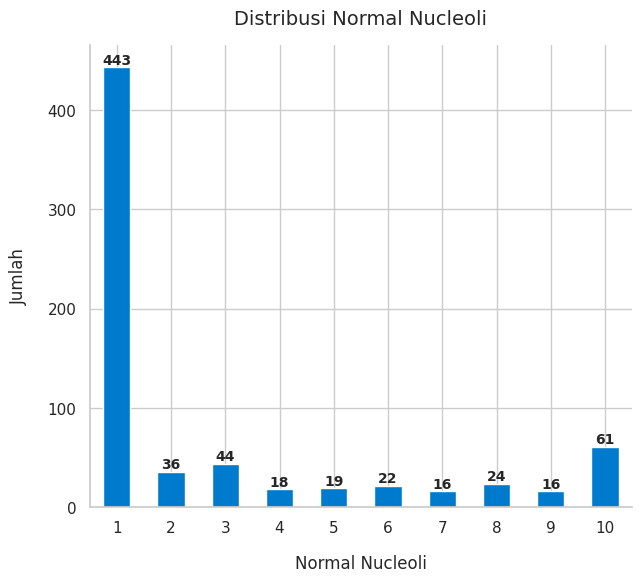

In [255]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Normal_nucleoli'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Normal Nucleoli", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Normal Nucleoli", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


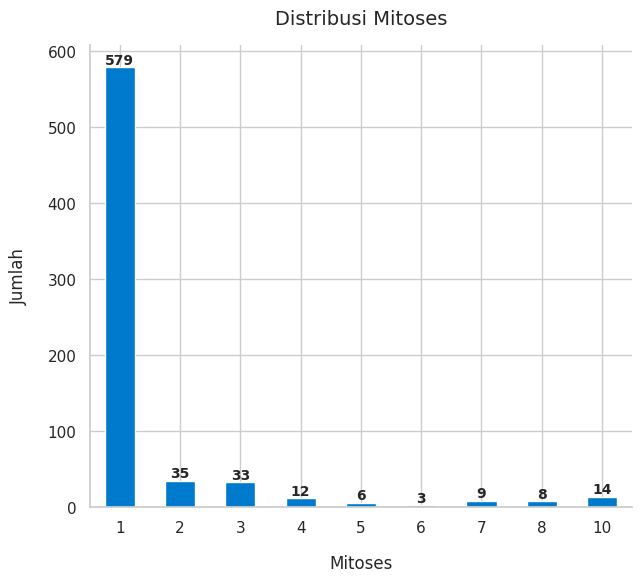

In [256]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Mitoses'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Mitoses", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Mitoses", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


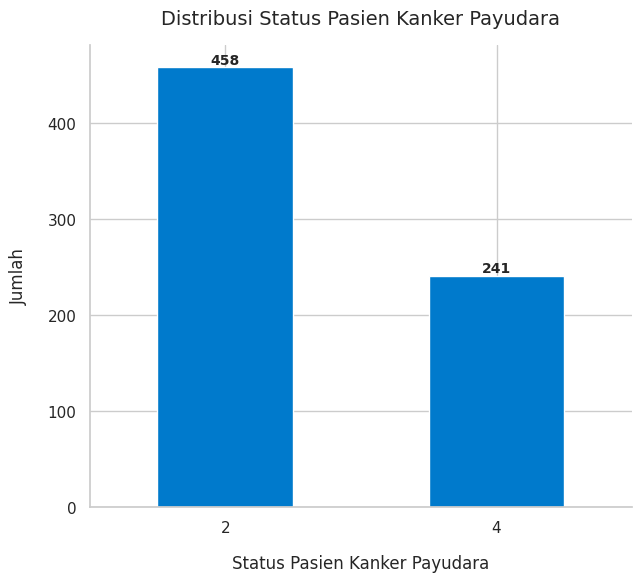

In [257]:
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataset['Class'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Status Pasien Kanker Payudara", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Status Pasien Kanker Payudara", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


## 3) Memvalidasi Data <a class="anchor" id="h3"></a>

## 4) Menentukan Objek Data <a class="anchor" id="h4"></a>

In [258]:
import numpy as np

In [259]:
# menghapus fitur yang tidak dapat digunakan
columns_to_drop = ['Sample_code_number']
dataset = dataset.drop(columns_to_drop, axis=1)

In [260]:
# menggantikan nilai "?"
dataset.replace("?", np.nan, inplace= True)

In [261]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_of_cell_size      699 non-null    int64 
 2   Uniformity_of_cell_shape     699 non-null    int64 
 3   Marginal_adhesion            699 non-null    int64 
 4   Single_epithelial_cell_size  699 non-null    int64 
 5   Bare_nuclei                  683 non-null    object
 6   Bland_chromatin              699 non-null    int64 
 7   Normal_nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


## 5) Membersihkan Data <a class="anchor" id="h5"></a>

In [262]:
# menghitung nilai Null pada dataset
dataset.isnull().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,16
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


In [263]:
# mendeteksi keberadaan nilai Null
dataset.loc[:, dataset.isnull().any()].columns

Index(['Bare_nuclei'], dtype='object')

In [264]:
# Mengubah Type data dari salah satu fitur
dataset['Bare_nuclei'] = dataset['Bare_nuclei'].astype(str).astype(float)

In [265]:
# Menampilkan Informasi dari data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [266]:
import missingno

<Axes: >

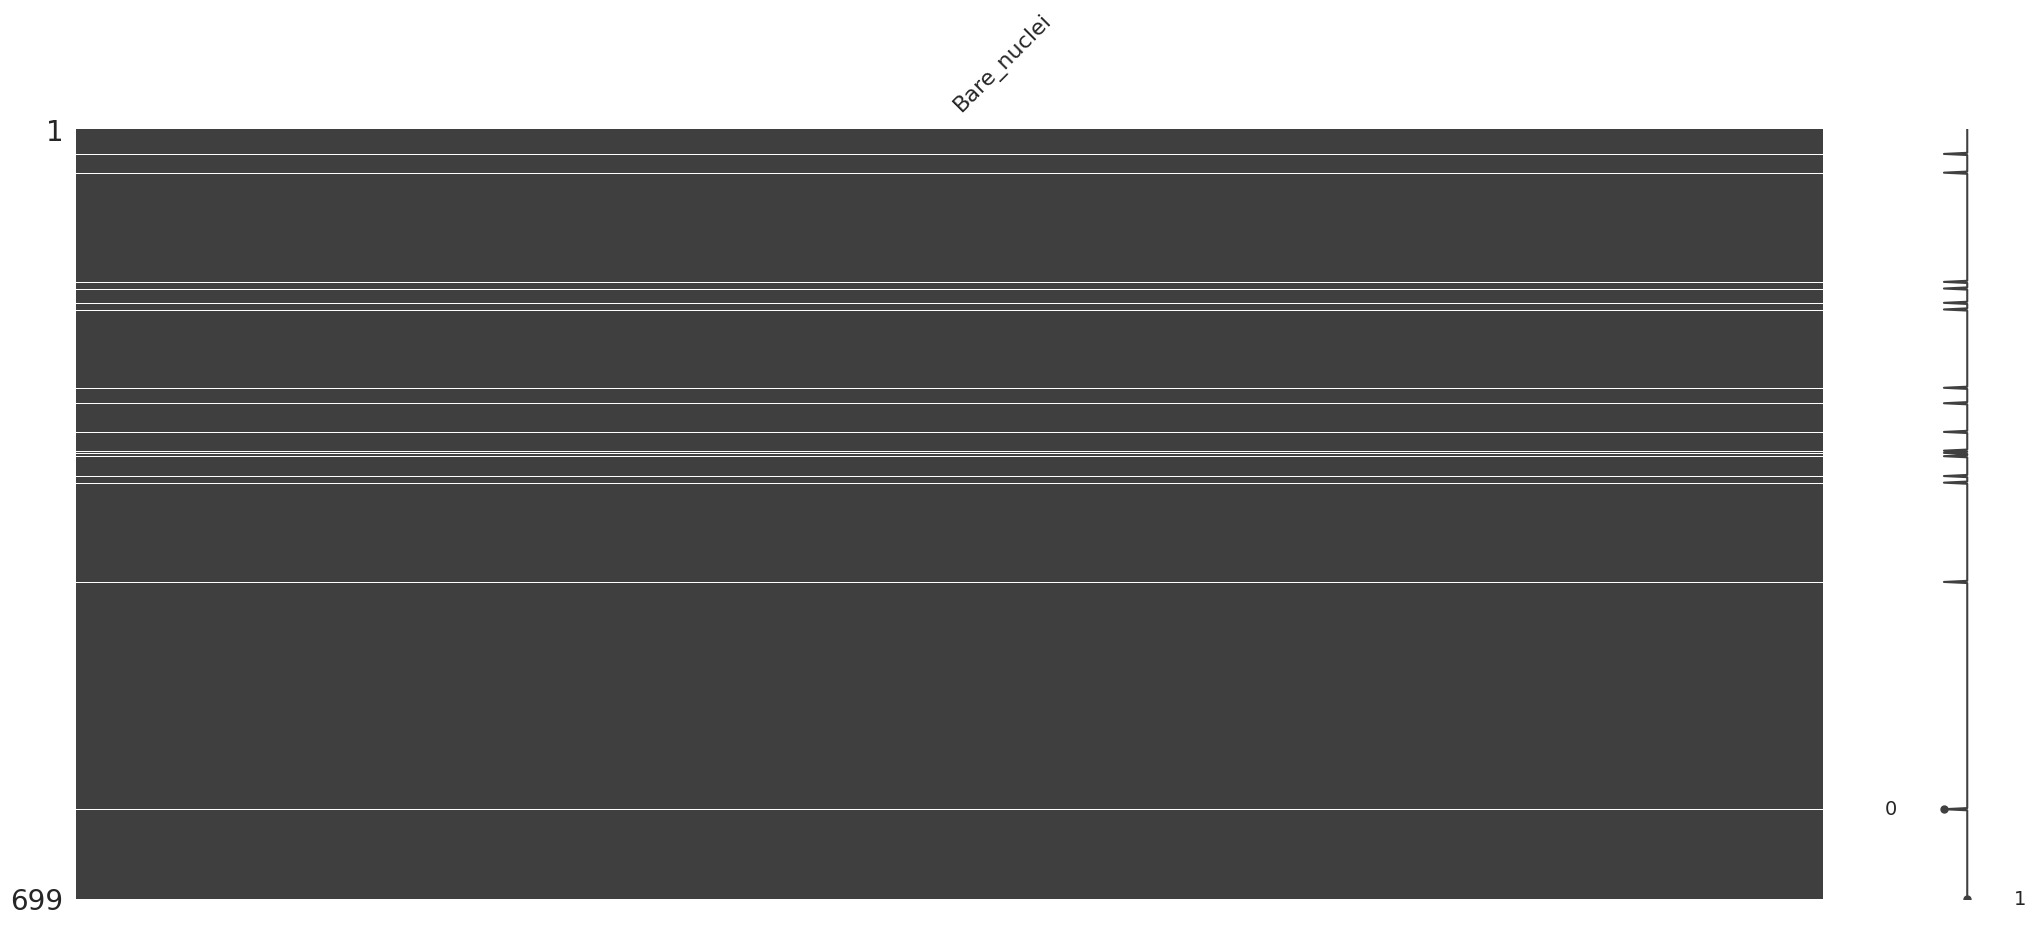

In [267]:
# Memvisualisasikan keberadaan nilai Null
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [268]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True), jika tidak maka

# median_value=dataset['fitur'].median()
# dataset['fitur'] =dataset['fitur'].fillna(median_value))

In [269]:
median_value=dataset['Bare_nuclei'].median()
dataset['Bare_nuclei']=dataset['Bare_nuclei'].fillna(median_value)

In [270]:
dataset.isnull().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,0
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


In [271]:
# Menampilkan data duplikat
duplicate_rows = dataset.duplicated()
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
4,4,1,1,3,2,1.0,3,1,1,2
10,1,1,1,1,1,1.0,3,1,1,2
11,2,1,1,1,2,1.0,2,1,1,2
16,4,1,1,1,2,1.0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1.0,1,1,1,2
688,4,1,1,1,2,1.0,1,1,1,2
690,1,1,1,3,2,1.0,1,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2


In [272]:
# Menghapus data duplikat, menyimpan data dalam variabel dataClean
dataClean = dataset.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class


In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [274]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              457 non-null    int64  
 1   Uniformity_of_cell_size      457 non-null    int64  
 2   Uniformity_of_cell_shape     457 non-null    int64  
 3   Marginal_adhesion            457 non-null    int64  
 4   Single_epithelial_cell_size  457 non-null    int64  
 5   Bare_nuclei                  457 non-null    float64
 6   Bland_chromatin              457 non-null    int64  
 7   Normal_nucleoli              457 non-null    int64  
 8   Mitoses                      457 non-null    int64  
 9   Class                        457 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 39.3 KB


## 6) Menkonstruksi Data <a class="anchor" id="h2"></a>

Class
4    238
2    219
Name: count, dtype: int64


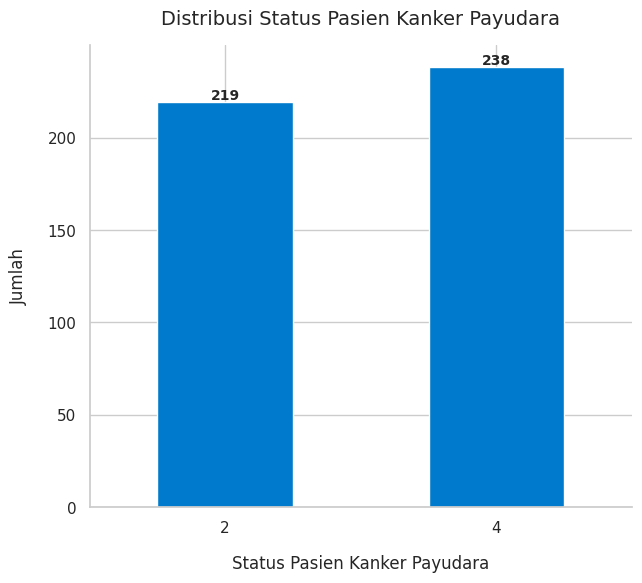

In [305]:
# Cetak jumlah masing-masing kategori
print(dataClean['Class'].value_counts())

# Setel style seaborn
sns.set(style="whitegrid", font_scale=1.0)

# Buat figure dan axis
plt.figure(figsize=(7, 6))
ax = dataClean['Class'].value_counts().sort_index().plot(
    kind='bar', color='#007ACC', rot=0
)

# Tambahkan label dan title
plt.xlabel("Status Pasien Kanker Payudara", fontsize=12, labelpad=14)
plt.ylabel("Jumlah", fontsize=12, labelpad=14)
plt.title("Distribusi Status Pasien Kanker Payudara", fontsize=14, pad=15)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()

# Tampilkan plot
plt.show()


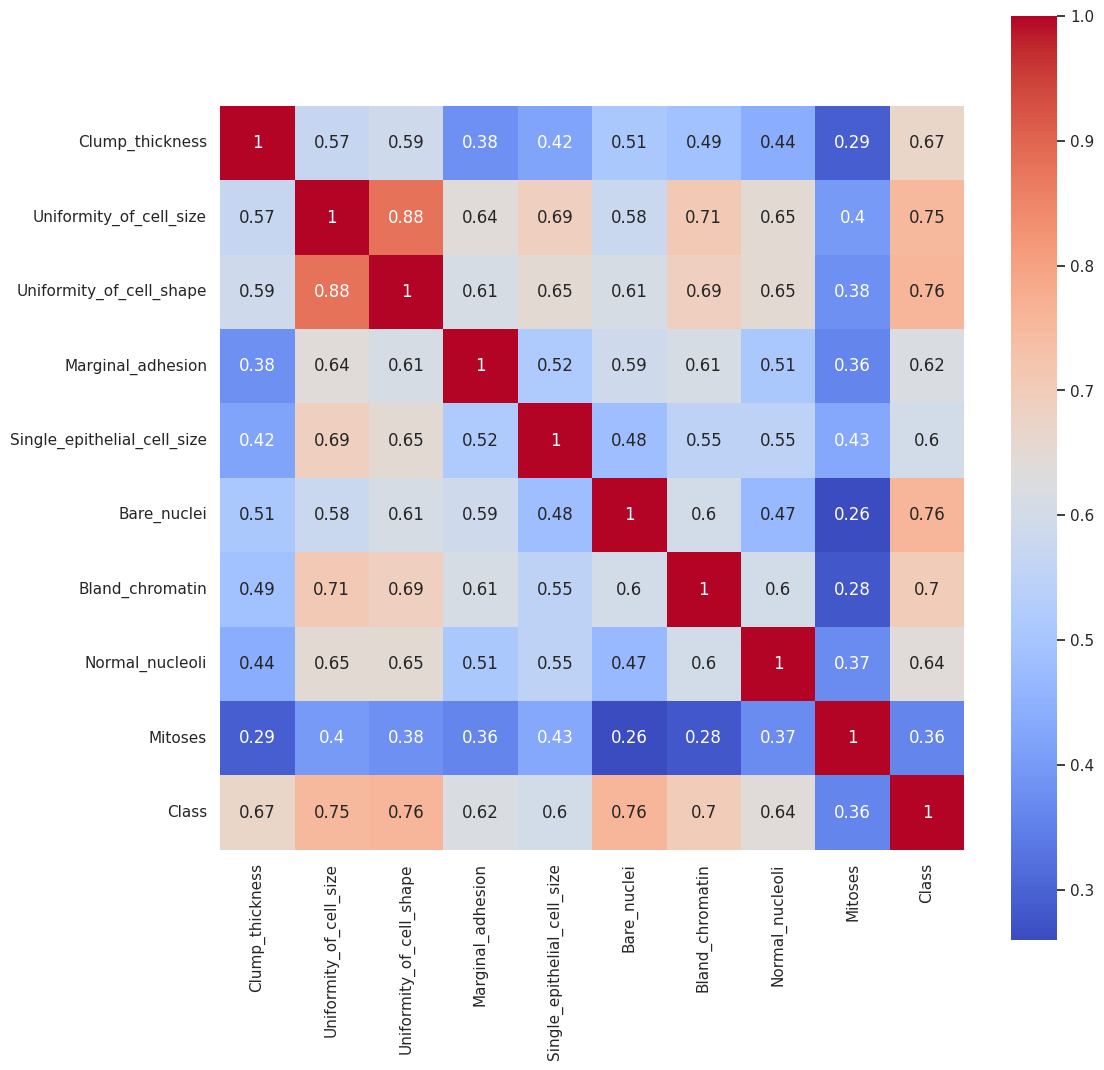

In [306]:
# Menampilkan Korelasi antar Fitur
correlation = dataClean.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'coolwarm')
plt.show()

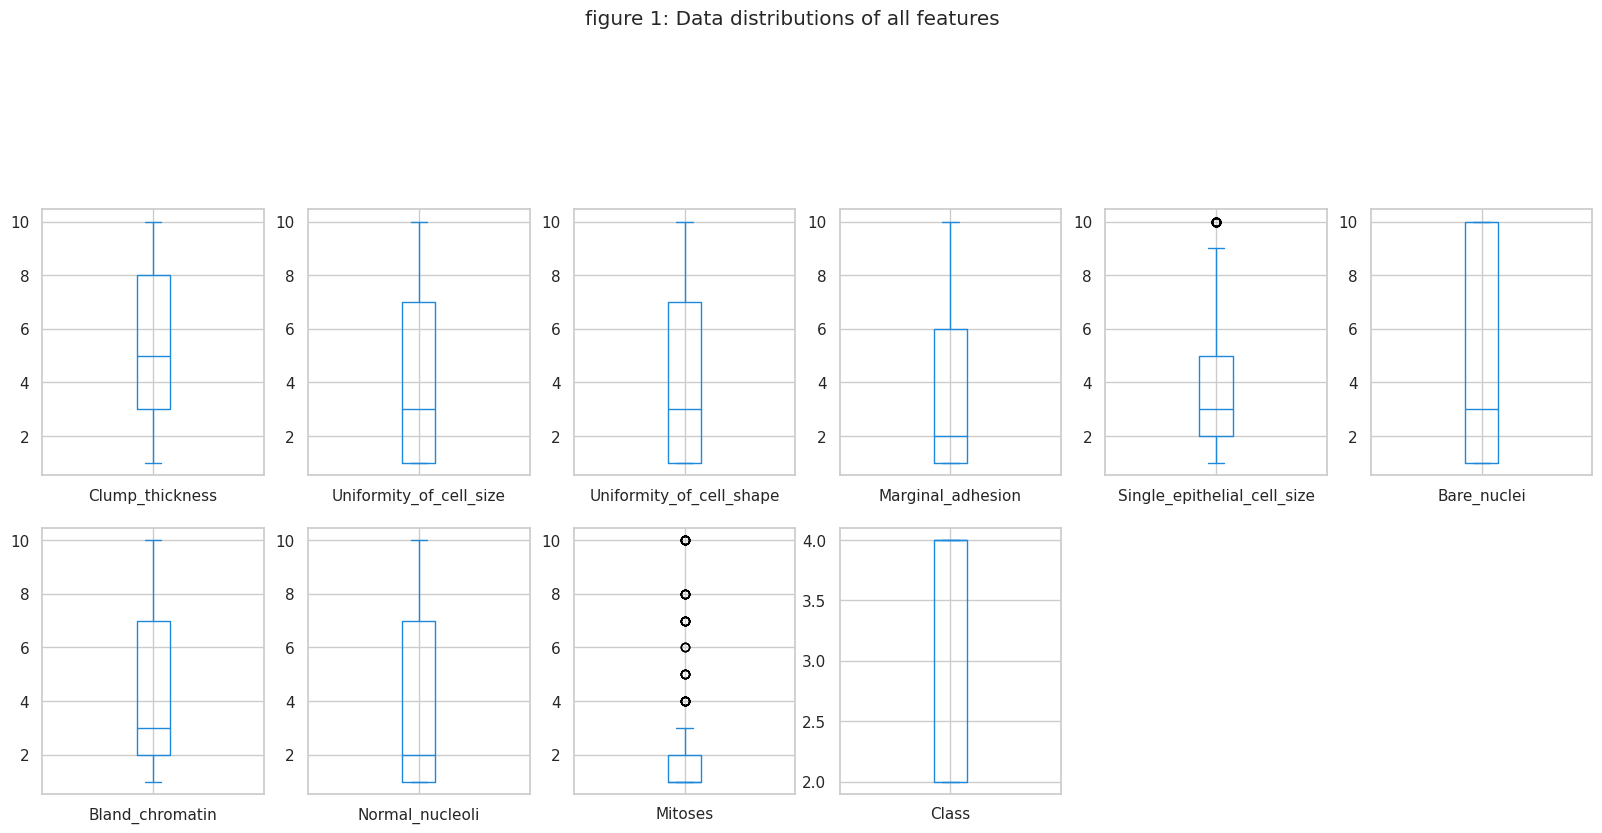

In [312]:
# Menampilkan Boxplot untuk melihat adanya Outlayer
dataClean.plot(kind='box',subplots=True,layout=(5,6), sharex=False, color='#1e88db', figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

In [278]:
#menampilkan deskripsi data yang sudah dibersihkan
dataClean.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,5.367615,4.216630,4.277899,3.726477,3.868709,4.739606,4.196937,3.840263,1.897155,3.041575
std,2.861665,3.240219,3.123098,3.157701,2.449545,3.878645,2.645037,3.392244,2.054182,1.000230
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [279]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              457 non-null    int64  
 1   Uniformity_of_cell_size      457 non-null    int64  
 2   Uniformity_of_cell_shape     457 non-null    int64  
 3   Marginal_adhesion            457 non-null    int64  
 4   Single_epithelial_cell_size  457 non-null    int64  
 5   Bare_nuclei                  457 non-null    float64
 6   Bland_chromatin              457 non-null    int64  
 7   Normal_nucleoli              457 non-null    int64  
 8   Mitoses                      457 non-null    int64  
 9   Class                        457 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 39.3 KB


In [280]:
dataClean

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1.0,2,1,2,2
694,3,1,1,1,3,2.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


## 7) Menentukan Label Data <a class="anchor" id="h7"></a>

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
X_norm= dataClean.drop("Class",axis=1).values
y = dataClean['Class']

In [283]:
# perbandingan data training dan data testing adalah 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

## 8) Membangun Model <a class="anchor" id="h8"></a>

In [284]:
# import library pemodelan yang digunakan
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [285]:
clean_classifier_nb = GaussianNB()
clean_classifier_nb .fit(X_train, y_train)

GaussianNB()

In [286]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt .fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [287]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf .fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 9) Mengevaluasi Hasil Pemodelan <a class="anchor" id="h9"></a>

In [288]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [289]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [290]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb),3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Random Forest Model:
Accuracy: 0.957
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.94      0.96        70
           4       0.94      0.97      0.96        68

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



In [291]:
evaluation(y_test,y_pred_nb)

{'accuracy': 0.957, 'recall': 0.957, 'F1 score': 0.957, 'Precision score': 0.957}


In [292]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Random Forest Model:
Accuracy: 0.913
Classification Report:
              precision    recall  f1-score   support

           2       0.89      0.94      0.92        70
           4       0.94      0.88      0.91        68

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138



In [293]:
evaluation(y_test,y_pred_dt)

{'accuracy': 0.913, 'recall': 0.913, 'F1 score': 0.913, 'Precision score': 0.914}


In [294]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.96      0.95        70
           4       0.96      0.94      0.95        68

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138



In [295]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.949}


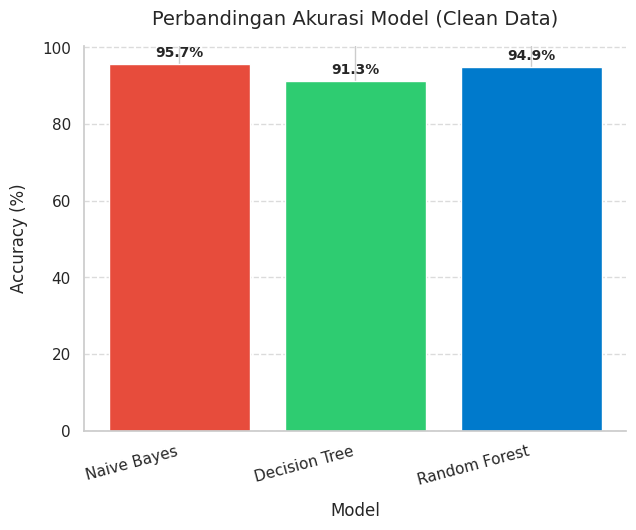

In [313]:
model_comp = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_nb * 100, accuracy_dt * 100, accuracy_rf * 100]
})

sns.set(style="whitegrid", font_scale=1.0)

# Membuat bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(model_comp['Model'], model_comp['Accuracy'], color=['#E74C3C', '#2ECC71', '#007ACC'])

# Label sumbu
ax.set_xlabel('Model', fontsize=12, labelpad=10)
ax.set_ylabel('Accuracy (%)', fontsize=12, labelpad=10)
ax.set_title('Perbandingan Akurasi Model (Clean Data)', fontsize=14, pad=15)

# Menambahkan grid horizontal untuk kejelasan
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Menambahkan angka di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{round(yval, 2)}%",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Memutar label x agar lebih rapi
plt.xticks(rotation=15, ha='right')

sns.despine()

# Tampilkan plot
plt.show()


## 10) Optimasi Model Klasifikasi <a class="anchor" id="h10"></a>

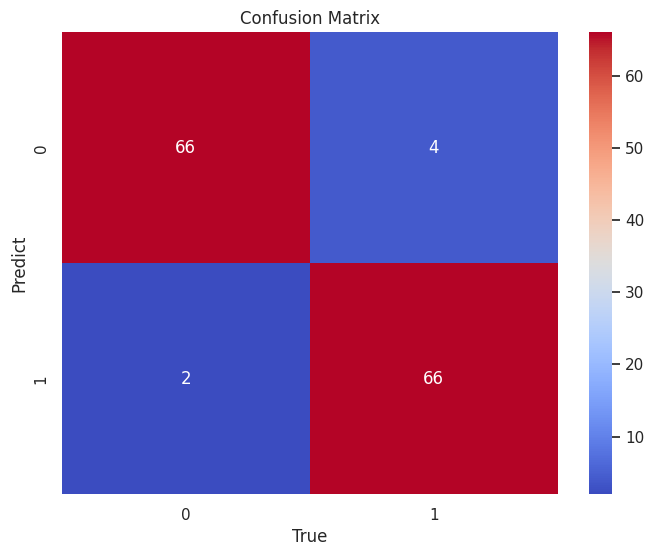

In [314]:
#nilai confusion matrix untuk model dengan akurasi tertinggi

cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [298]:
columns_to_drop = ['Mitoses', 'Class']
X_selected= dataClean.drop(columns_to_drop, axis=1).values
y = dataClean['Class']

In [299]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [300]:
selected_classifier_nb = GaussianNB()
selected_classifier_nb.fit(X_train_selected, y_train_selected)

GaussianNB()

In [301]:
y_pred_nb_selected = selected_classifier_nb.predict(X_test_selected)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_nb_selected = round(accuracy_score(y_test_selected, y_pred_nb_selected),3)
print("Accuracy:",accuracy_nb_selected)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_nb_selected))


Random Forest Model:
Accuracy: 0.964
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.96      0.96        70
           4       0.96      0.97      0.96        68

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



In [302]:
evaluation(y_test_selected,y_pred_nb_selected)

{'accuracy': 0.964, 'recall': 0.964, 'F1 score': 0.964, 'Precision score': 0.964}


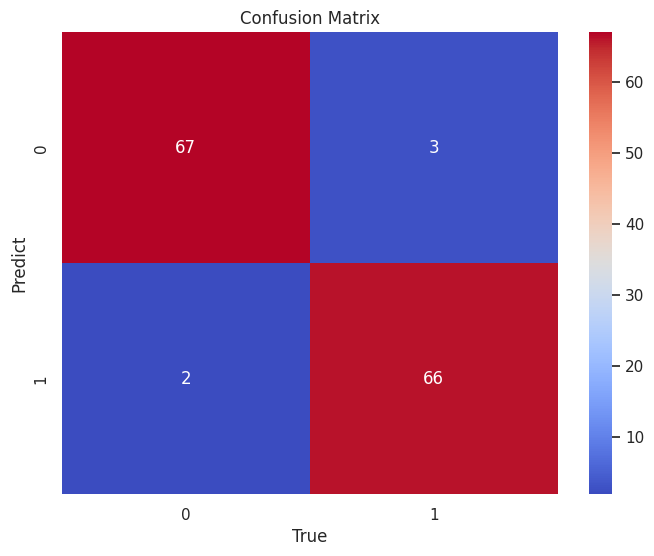

In [315]:
cm = confusion_matrix(y_test, y_pred_nb_selected)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

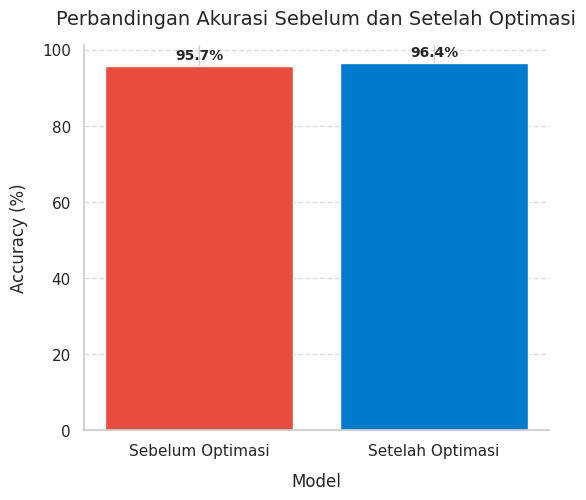

In [316]:
model_comp = pd.DataFrame({
    'Model': ['Sebelum Optimasi', 'Setelah Optimasi'],
    'Accuracy': [accuracy_nb * 100, accuracy_nb_selected * 100]
})

sns.set(style="whitegrid", font_scale=1.0)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(model_comp['Model'], model_comp['Accuracy'], color=['#E74C3C', '#007ACC'])

# Tambahkan label dan judul
ax.set_xlabel('Model', fontsize=12, labelpad=10)
ax.set_ylabel('Accuracy (%)', fontsize=12, labelpad=10)
ax.set_title('Perbandingan Akurasi Sebelum dan Setelah Optimasi', fontsize=14, pad=15)

# Tambahkan grid horizontal
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Tambahkan angka di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{round(yval, 2)}%",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Atur rotasi label X agar lebih rapi
plt.xticks(rotation=0)

sns.despine()

# Tampilkan plot
plt.show()
